Here we visualize filters and outputs using the network architecture proposed by Krizhevsky et al. for ImageNet and implemented in `caffe`.

(This page follows DeCAF visualizations originally by Yangqing Jia.)

First, import required modules, set plotting parameters, and run `./scripts/download_model_binary.py models/bvlc_reference_caffenet` to get the pretrained CaffeNet model if it hasn't already been fetched.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../'  # this file is expected to be in {caffe_root}/examples
import sys
# sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os
if not os.path.isfile(caffe_root + 'examples/cifar10/cifar10_quick_iter_5000.caffemodel'):
    print("Downloading pre-trained CaffeNet model...")
    !../scripts/download_model_binary.py ../models/bvlc_reference_caffenet

Model already exists.


Set Caffe to CPU mode, load the net in the test phase for inference, and configure input preprocessing.

In [3]:
caffe.set_mode_cpu()
# net = caffe.Net('/media/hexiangh/kaggle/experiments/17_classification_GoogleNet_relight_rotate_scratch/deploy.prototxt',
#                 '/media/hexiangh/kaggle/experiments/17_classification_GoogleNet_relight_rotate_scratch'\
#                 '/snapshots_s1/snapshots_s1_iter_130000.caffemodel',
#                 caffe.TEST)
# net = caffe.Net('/media/hexiangh/kaggle/experiments/10_classification_GoogleLeNet_hinge_balanced_scratch/deploy.prototxt',
#                 '/media/hexiangh/kaggle/experiments/10_classification_GoogleLeNet_hinge_balanced_scratch'\
#                 '/snapshots/snapshots_iter_160000.caffemodel',
#                 caffe.TEST)
net = caffe.Net('/media/hexiangh/caffe-hex/models/bvlc_googlenet/deploy.prototxt',
                '/media/hexiangh/caffe-hex/models/bvlc_googlenet/'\
                'bvlc_googlenet.caffemodel',
                caffe.TEST)
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

Classify the image by reshaping the net for the single input then doing the forward pass.

In [5]:
net.blobs['data'].reshape(1,3,224,224)
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image('/media/hexiangh/kaggle/plain-small/val/10017_left.jpeg'))
out = net.forward()
print("Predicted class is #{}.".format(out['prob'].argmax()))

Predicted class is #577.


The layer features and their shapes (1 is the batch size, corresponding to the single input image in this example).

In [4]:
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 3, 224, 224)),
 ('conv1/7x7_s2', (1, 64, 112, 112)),
 ('pool1/3x3_s2', (1, 64, 56, 56)),
 ('pool1/norm1', (1, 64, 56, 56)),
 ('conv2/3x3_reduce', (1, 64, 56, 56)),
 ('conv2/3x3', (1, 192, 56, 56)),
 ('conv2/norm2', (1, 192, 56, 56)),
 ('pool2/3x3_s2', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_0', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_1', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_2', (1, 192, 28, 28)),
 ('pool2/3x3_s2_pool2/3x3_s2_0_split_3', (1, 192, 28, 28)),
 ('inception_3a/1x1', (1, 64, 28, 28)),
 ('inception_3a/3x3_reduce', (1, 96, 28, 28)),
 ('inception_3a/3x3', (1, 128, 28, 28)),
 ('inception_3a/5x5_reduce', (1, 16, 28, 28)),
 ('inception_3a/5x5', (1, 32, 28, 28)),
 ('inception_3a/pool', (1, 192, 28, 28)),
 ('inception_3a/pool_proj', (1, 32, 28, 28)),
 ('inception_3a/output', (1, 256, 28, 28)),
 ('inception_3a/output_inception_3a/output_0_split_0', (1, 256, 28, 28)),
 ('inception_3a/output_inception_3a/output_0_split_1',

The parameters and their shapes. The parameters are `net.params['name'][0]` while biases are `net.params['name'][1]`.

In [5]:
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1/7x7_s2', (64, 3, 7, 7)),
 ('conv2/3x3_reduce', (64, 64, 1, 1)),
 ('conv2/3x3', (192, 64, 3, 3)),
 ('inception_3a/1x1', (64, 192, 1, 1)),
 ('inception_3a/3x3_reduce', (96, 192, 1, 1)),
 ('inception_3a/3x3', (128, 96, 3, 3)),
 ('inception_3a/5x5_reduce', (16, 192, 1, 1)),
 ('inception_3a/5x5', (32, 16, 5, 5)),
 ('inception_3a/pool_proj', (32, 192, 1, 1)),
 ('inception_3b/1x1', (128, 256, 1, 1)),
 ('inception_3b/3x3_reduce', (128, 256, 1, 1)),
 ('inception_3b/3x3', (192, 128, 3, 3)),
 ('inception_3b/5x5_reduce', (32, 256, 1, 1)),
 ('inception_3b/5x5', (96, 32, 5, 5)),
 ('inception_3b/pool_proj', (64, 256, 1, 1)),
 ('inception_4a/1x1', (192, 480, 1, 1)),
 ('inception_4a/3x3_reduce', (96, 480, 1, 1)),
 ('inception_4a/3x3', (208, 96, 3, 3)),
 ('inception_4a/5x5_reduce', (16, 480, 1, 1)),
 ('inception_4a/5x5', (48, 16, 5, 5)),
 ('inception_4a/pool_proj', (64, 480, 1, 1)),
 ('inception_4b/1x1', (160, 512, 1, 1)),
 ('inception_4b/3x3_reduce', (112, 512, 1, 1)),
 ('inception_4b/3x3', (2

Helper functions for visualization

In [8]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

The input image

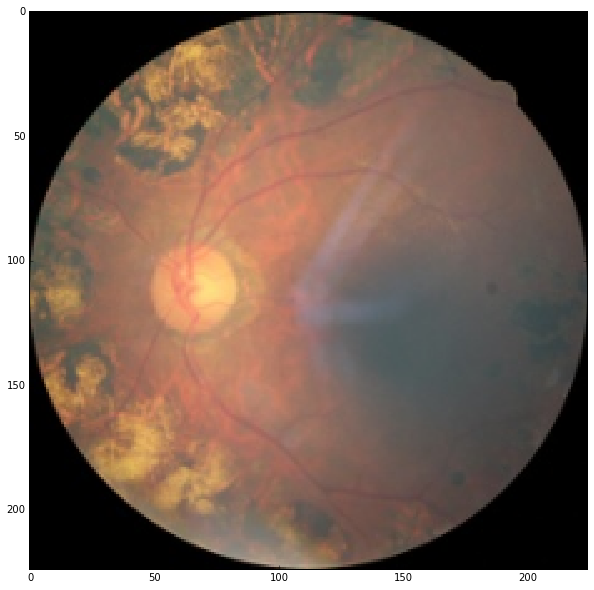

In [6]:
plt.imshow(transformer.deprocess('data', net.blobs['data'].data[0]))

The first layer filters, `conv1`

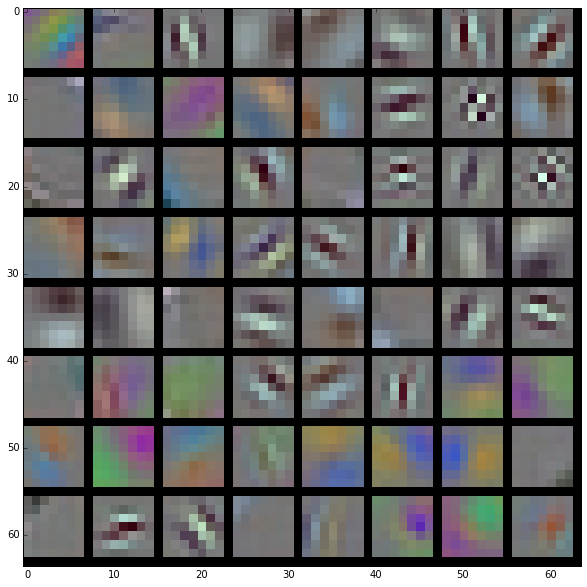

In [9]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1/7x7_s2'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

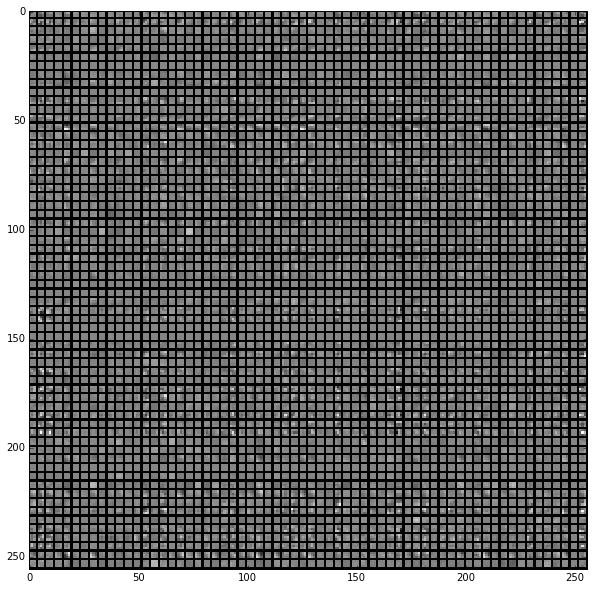

In [9]:
filters = net.params['conv2/3x3'][0].data
num_filters = 64
vis_square(filters[:num_filters].reshape(num_filters*64, 3, 3))

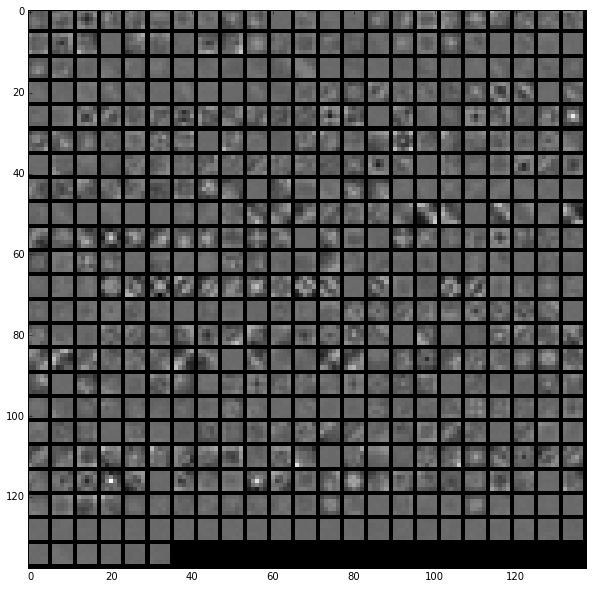

In [10]:
filters = net.params['inception_3a/5x5'][0].data
vis_square(filters.reshape(-1, 5, 5))

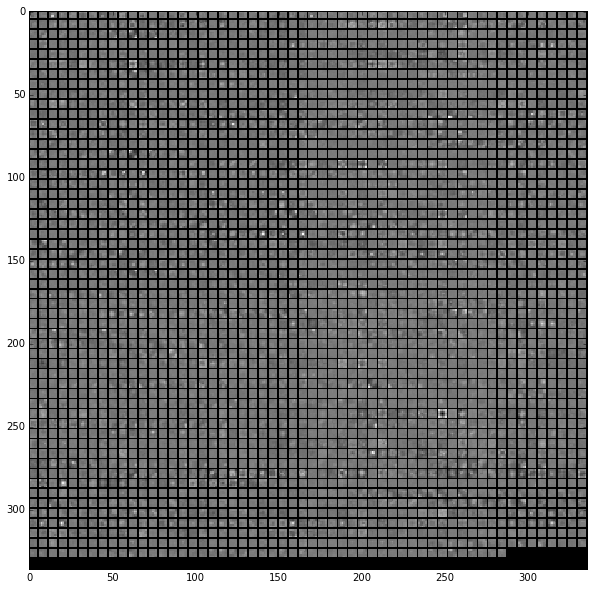

In [11]:
filters = net.params['inception_3b/5x5'][0].data
vis_square(filters.reshape(-1, 5, 5))

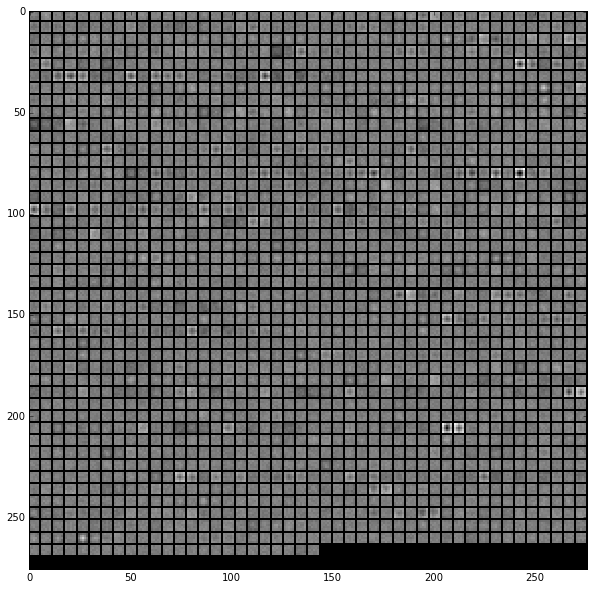

In [12]:
filters = net.params['inception_4d/5x5'][0].data
vis_square(filters.reshape(-1, 5, 5))

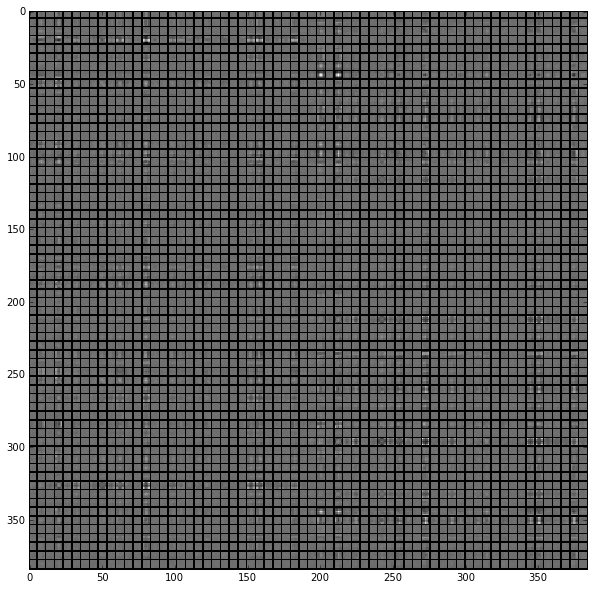

In [13]:
filters = net.params['inception_5a/5x5'][0].data
vis_square(filters.reshape(-1, 5, 5))

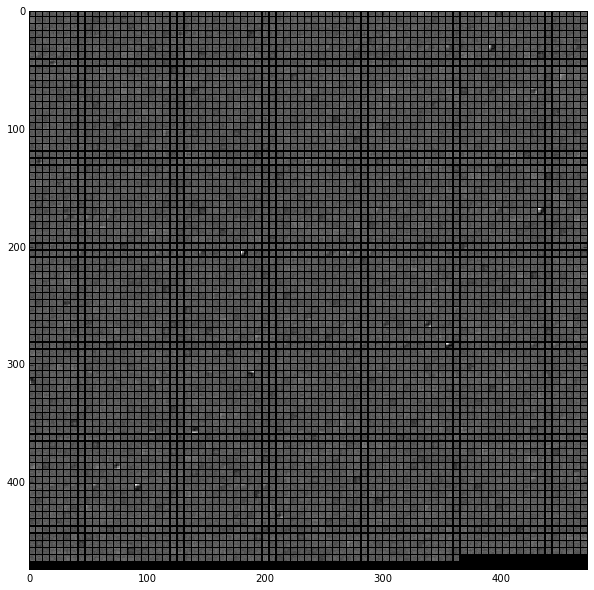

In [14]:
filters = net.params['inception_5b/5x5'][0].data
vis_square(filters.reshape(-1, 5, 5))

# Activations

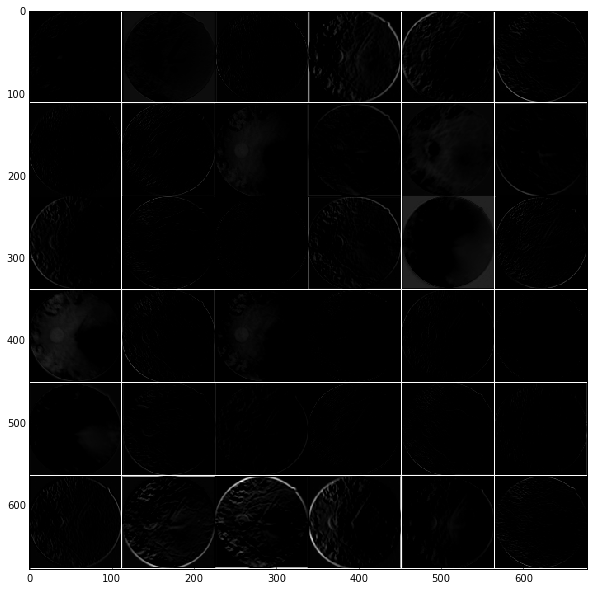

In [10]:
feat = net.blobs['conv1/7x7_s2'].data[0, :36]
vis_square(feat, padval=1)

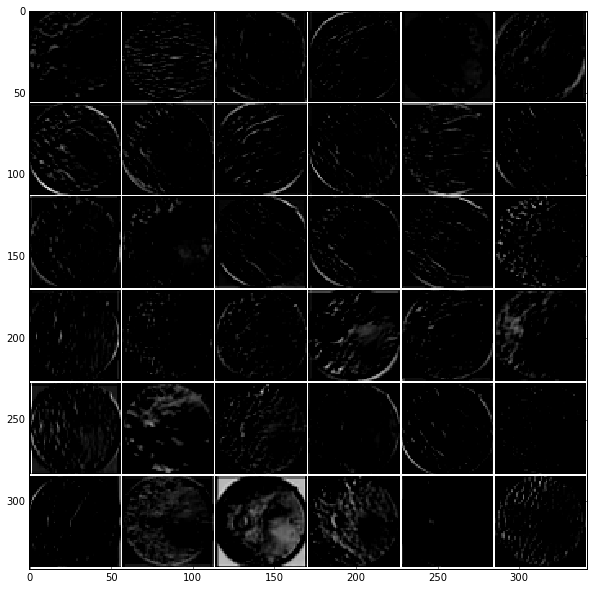

In [11]:
feat = net.blobs['conv2/3x3'].data[0, :36]
vis_square(feat, padval=1)

The third layer output, `conv3` (rectified, all 384 channels)

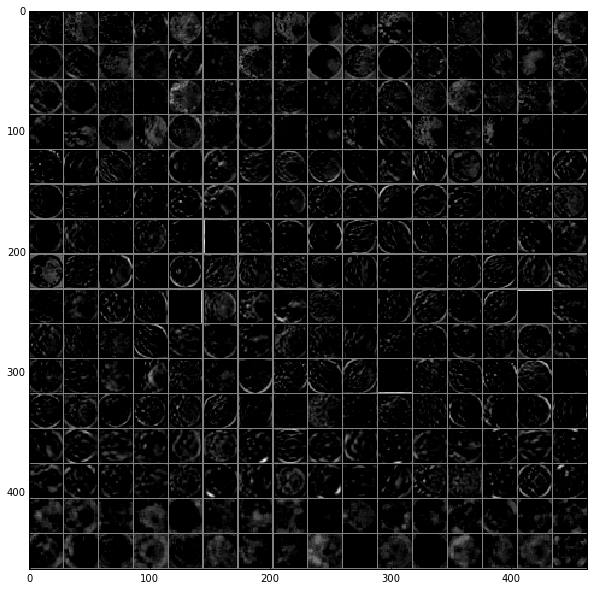

In [12]:
feat = net.blobs['inception_3a/output'].data[0]
vis_square(feat, padval=0.5)

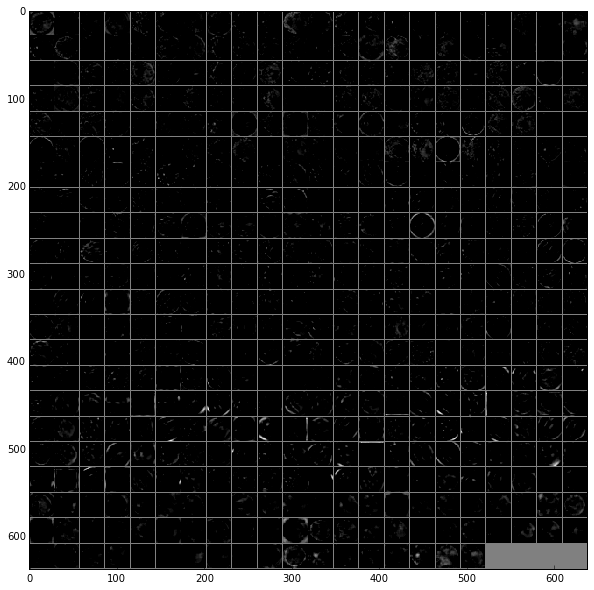

In [13]:
feat = net.blobs['inception_3b/output'].data[0]
vis_square(feat, padval=0.5)

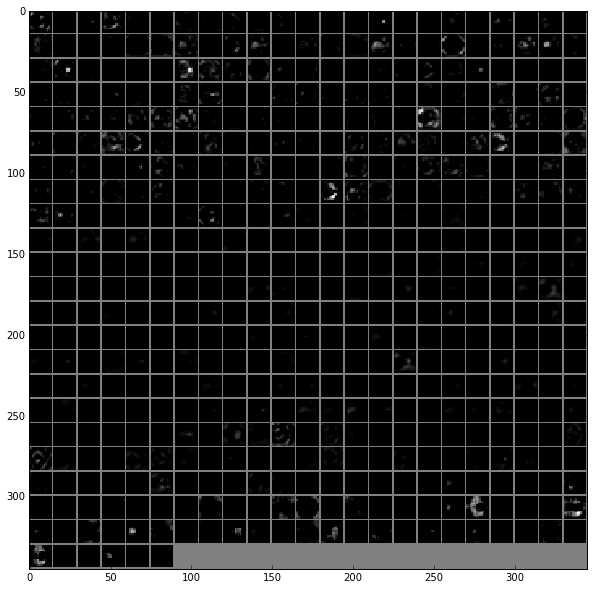

In [19]:
feat = net.blobs['inception_4a/output'].data[0]
vis_square(feat, padval=0.5)

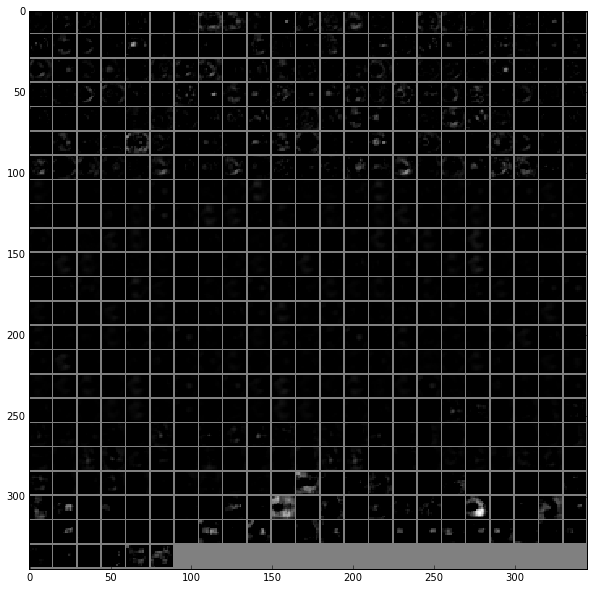

In [20]:
feat = net.blobs['inception_4b/output'].data[0]
vis_square(feat, padval=0.5)

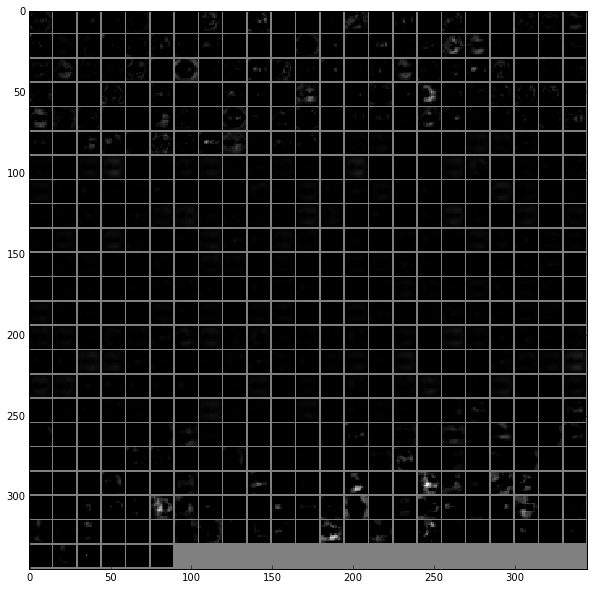

In [21]:
feat = net.blobs['inception_4c/output'].data[0]
vis_square(feat, padval=0.5)

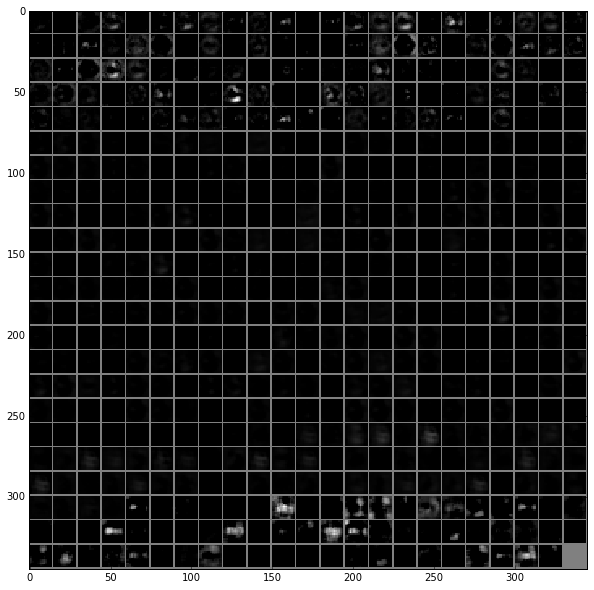

In [22]:
feat = net.blobs['inception_4d/output'].data[0]
vis_square(feat, padval=0.5)

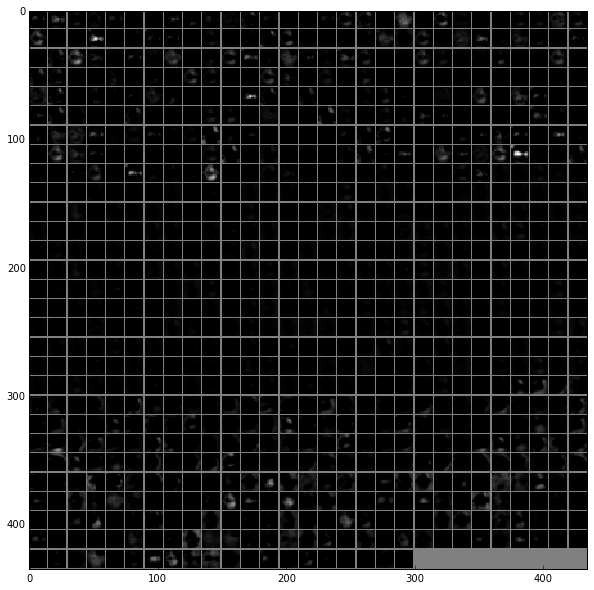

In [23]:
feat = net.blobs['inception_4e/output'].data[0]
vis_square(feat, padval=0.5)

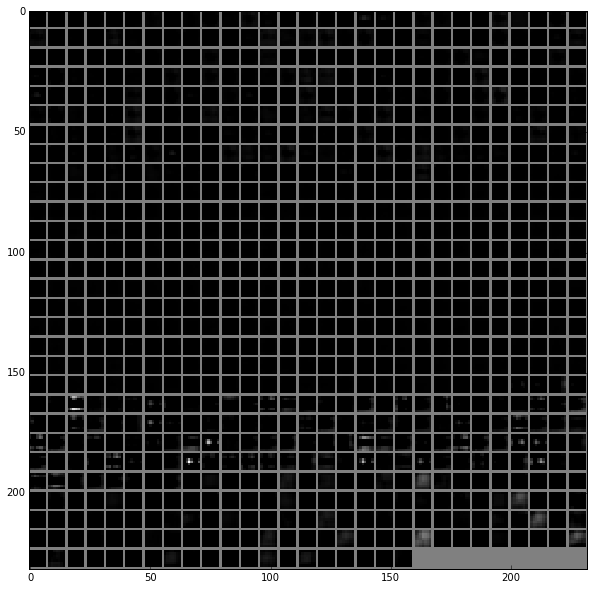

In [24]:
feat = net.blobs['inception_5a/output'].data[0]
vis_square(feat, padval=0.5)

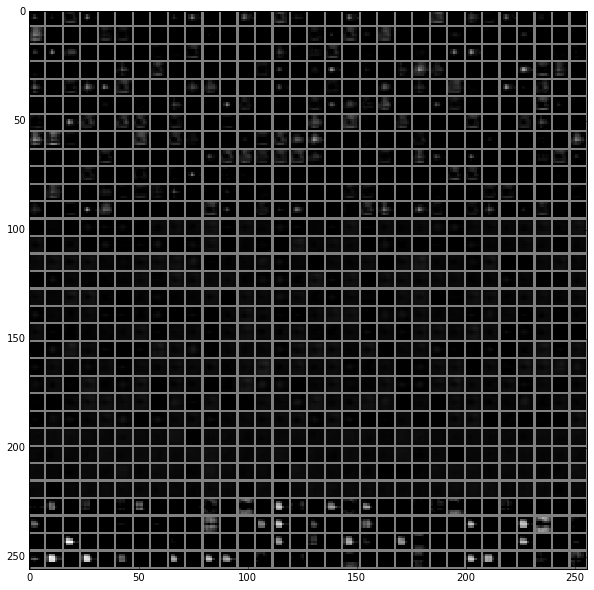

In [25]:
feat = net.blobs['inception_5b/output'].data[0]
vis_square(feat, padval=0.5)

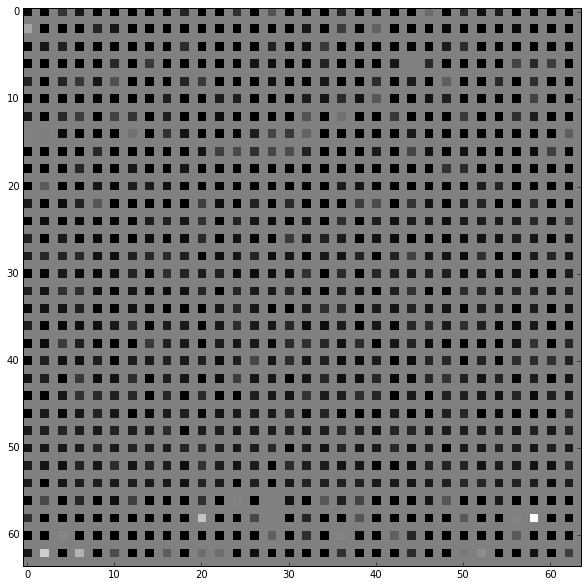

In [26]:
feat = net.blobs['pool5/7x7_s1'].data[0]
vis_square(feat, padval=0.5)